In [178]:
import h5py
import numpy as np
import glob2
import os
import itertools
import json

import seaborn as sns
import matplotlib.pyplot as plt

In [345]:
# All params
Q_list = [0.15]
W_list = [0.15]
D_list = [0.6]
T_list = [1]
wb_list = [5.0]
decay_list = [18.0]
# seed_list = list(np.arange(0, 25))
seed_list = 0

num_timesteps = 60

In [346]:
param_sets = list(itertools.product(Q_list, W_list, D_list, T_list, wb_list, decay_list))

base_exp_dir = ""


Grab distances at t=2000 for all bees 

In [347]:
distance_data = {}
for param in param_sets:
    Q = param[0]
    W = param[1]
    D = param[2]
    T = param[3]
    wb = param[4]
    decay = param[5]
    param_dir = f"Q{Q}_W{W}_D{D}_T{T:0.4f}_wb{wb}_decay{decay}"

    distance_data[param_dir] = {}
    bee_path = os.path.join(base_exp_dir, f"{param_dir}_seed{seed_list}", "bee_hist.h5")

    print(f"bee_path: {bee_path} \n")

    # Get distance data
    bee_data = {}
    with h5py.File(bee_path, 'r') as infile:
        for key, val in infile.items():
            bee_data[key] = np.array(val)

    bee_nums = np.unique(bee_data['bee_i'])
    bees = {}
    for bee_num in bee_nums:
        idxs = np.where(bee_data['bee_i']==bee_num)
        bee_x = bee_data['x'][idxs]
        bee_y = bee_data['y'][idxs]
        bee_state = bee_data['state'][idxs]
        distance = bee_data['distance_from_queen'][idxs]
        bee_grads = bee_data['gradient_x'][idxs], bee_data['gradient_y'][idxs]
        bias = bee_data['wx'][idxs], bee_data['wy'][idxs]
        bees[bee_num] = {"x" : bee_x, "y" : bee_y, "state": bee_state,
                        "distance": distance, "grads" : bee_grads}
    # Extract distance
    num_bees = np.unique(bee_data['bee_i']).shape[0]
    distances_per_t = bee_data['distance_from_queen'].reshape(-1, num_bees)

    data_idx = num_timesteps // 2
    


#         median_distances = list(np.mean(distances_per_t, axis=1))

#         trial_str = str(trial)
#         distance_data[param_dir][trial_str] = median_distances



bee_path: Q0.15_W0.15_D0.6_T1.0000_wb5.0_decay18.0_seed0/bee_hist.h5 



In [348]:
# time1 = int(distances_per_t.shape[0] / 4 - 1)
time1 = 99
time2 = int(distances_per_t.shape[0] / 2 - 1)
time3 = int(distances_per_t.shape[0] / 1 - 1)
time1, time2, time3

(99, 399, 799)

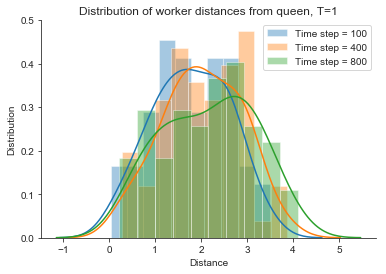

In [349]:
sns.set_style("ticks")
sns.distplot(distances_per_t[time1,:], hist=True, label=f"Time step = {time1+1}",  bins=10, kde=True)
sns.distplot(distances_per_t[time2,:], hist=True, label=f"Time step = {time2+1}",  bins=10, kde=True)
sns.distplot(distances_per_t[time3,:], hist=True, label=f"Time step = {time3+1}",  bins=10, kde=True)
plt.xlabel('Distance')
plt.ylabel('Distribution')
plt.title(f'Distribution of worker distances from queen, T={T_list[0]}')
plt.legend()
sns.despine()

plt.savefig(f'T={T_list[0]}.png')
